# Analyze the data structure. (Compare the original data and synthetic data)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plot_path = '../evaluation/structure'

## Prepare the datasets

### Synthetic data

In [3]:
# import synhtetic data
synthetic_data = pd.read_csv('../data_for_markov_model/synthetic_data_mm_SmartTag_(nearby).csv', index_col=0)
synthetic_data

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599996,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599997,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
599998,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


### Original data

In [4]:
# import original data
original_data = pd.read_csv('../data_for_markov_model/processed_SmartTag_(nearby).csv', index_col=0)
original_data

,Length Packet,Length Header,Length MS Data,Length Service Data,CH 37,CH 38,CH 39,AD Manufacturer Specific,AD Flags,AD Tx Power Level,...,PDU ADV_NONCONN_IND,PDU ADV_SCAN_IND,PDU Other,CT 07,CT 12,CT Other,ST 3,ST 5,ST Other,Label
0,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
1,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
2,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
3,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
4,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24033,63,37,0,160,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24034,63,37,0,160,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24035,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)
24036,63,37,0,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,SmartTag (nearby)


## Compare the data structure

### Length

In [31]:
# Calculate the count of each combination of 'Length Packet', 'Length Header', 'Length MS Data', 'Length Service Data'
original_length_counts = original_data.groupby(['Length Packet', 'Length Header', 'Length MS Data', 'Length Service Data']).size().reset_index(name='Count')
original_length_counts['Percentage'] = (original_length_counts['Count'] / original_length_counts['Count'].sum()) * 100

# Calculate the count of each combination of 'UUID Samsung' and 'UUID Other' in synthetic_data
synthetic_length_counts = synthetic_data.groupby(['Length Packet', 'Length Header', 'Length MS Data', 'Length Service Data']).size().reset_index(name='Count')
synthetic_length_counts['Percentage'] = (synthetic_length_counts['Count'] / synthetic_length_counts['Count'].sum()) * 100

# Update row names
row_names = ['32_6_0_0', '36_37_0_0', '38_12_0_0', '63_37_0_0', '63_37_0_160', '63_37_176_0']
original_length_counts.index = row_names
synthetic_length_counts.index = row_names

length_percentage_original = original_length_counts['Percentage']
length_percentage_synthetic = synthetic_length_counts['Percentage']

length_percentage_df = pd.DataFrame({
    'Original Data': length_percentage_original,
    'Synthetic Data': length_percentage_synthetic
})

length_percentage_df = length_percentage_df.T

length_percentage_df

,32_6_0_0,36_37_0_0,38_12_0_0,63_37_0_0,63_37_0_160,63_37_176_0
Original Data,0.395208,0.045761,0.395208,0.012480,99.143024,0.008320
Synthetic Data,0.391167,0.060167,0.386167,0.013167,99.145167,0.004167


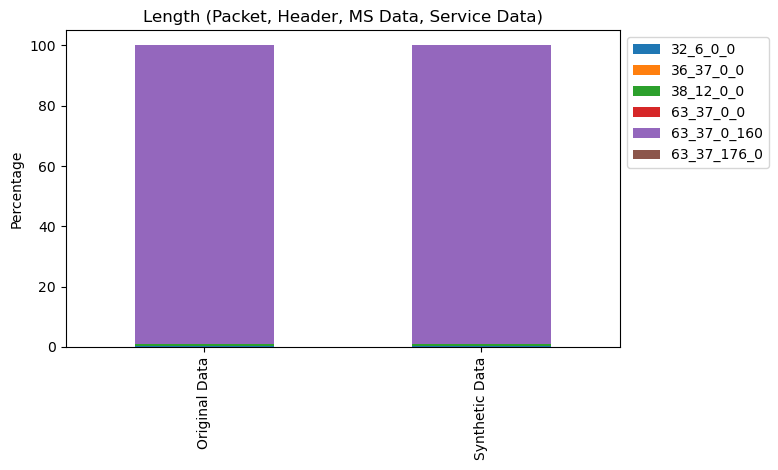

In [33]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
length_percentage_df_normalized = length_percentage_df.div(length_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
length_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('Length (Packet, Header, MS Data, Service Data)')
plt.ylabel('Percentage')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust legend position to prevent overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.savefig(f"{plot_path}/length.png", bbox_inches='tight')
plt.show()

### Channel

In [5]:
# Calculate the percentage of each CH in original_data
original_ch_counts = original_data[['CH 37', 'CH 38', 'CH 39']].sum()
original_ch_percentage = original_ch_counts / original_ch_counts.sum() * 100

# Calculate the percentage of each CH in synthetic_data
synthetic_ch_counts = synthetic_data[['CH 37', 'CH 38', 'CH 39']].sum()
synthetic_ch_percentage = synthetic_ch_counts / synthetic_ch_counts.sum() * 100

# Create a DataFrame for plotting
ch_percentage_df = pd.DataFrame({
    'Original Data': original_ch_percentage,
    'Synthetic Data': synthetic_ch_percentage
})

# Transpose the DataFrame for plotting
ch_percentage_df = ch_percentage_df.T

ch_percentage_df

,CH 37,CH 38,CH 39
Original Data,60.316998,29.765371,9.917630
Synthetic Data,60.232000,29.796333,9.971667


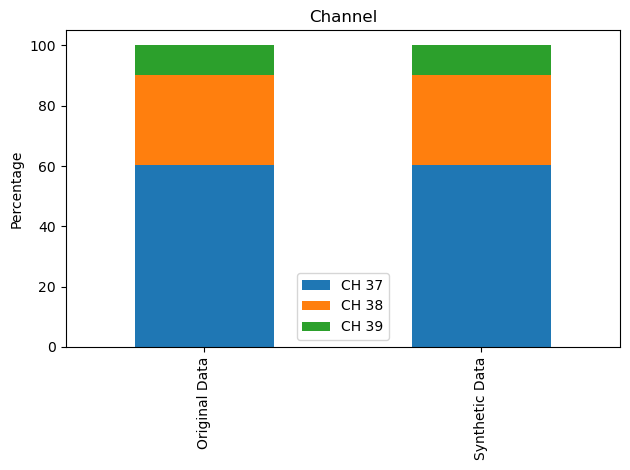

In [6]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
ch_percentage_df_normalized = ch_percentage_df.div(ch_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
ch_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('Channel')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig(f"{plot_path}/channel.png")
plt.show()

### AD type

In [ ]:
# Calculate the sum of each column
ad_flags_sum = original_data['AD Flags'].sum()
ad_service_data_sum = original_data['AD Service Data - 16 bit UUID'].sum()
ad_16bit_service_class_sum = original_data['AD 16-bit Service Class UUIDs (incomplete)'].sum()
ad_other_sum = original_data['AD Other'].sum()

# Calculate the total sum of all columns
total_sum = ad_flags_sum + ad_service_data_sum + ad_16bit_service_class_sum + ad_other_sum

# Calculate the percentage of each column
ad_flags_percentage = (ad_flags_sum / total_sum) * 100
ad_service_data_percentage = (ad_service_data_sum / total_sum) * 100
ad_16bit_service_class_percentage = (ad_16bit_service_class_sum / total_sum) * 100
ad_other_percentage = (ad_other_sum / total_sum) * 100

# Create a DataFrame to display the results
ad_summary_df = pd.DataFrame({
    'Sum': [ad_flags_sum, ad_service_data_sum, ad_16bit_service_class_sum, ad_other_sum],
    'Percentage': [ad_flags_percentage, ad_service_data_percentage, ad_16bit_service_class_percentage, ad_other_percentage]
}, index=['AD Flags', 'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other'])

ad_summary_df

In [22]:
# Calculate the count of each combination of 'AD Flags', 'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other' in original_data
original_ad_counts = original_data.groupby(['AD Flags', 'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other']).size().reset_index(name='Count')
original_ad_counts['Percentage'] = (original_ad_counts['Count'] / original_ad_counts['Count'].sum()) * 100

# Calculate the count of each combination of 'UUID Samsung' and 'UUID Other' in synthetic_data
synthetic_ad_counts = synthetic_data.groupby(['AD Flags', 'AD Service Data - 16 bit UUID', 'AD 16-bit Service Class UUIDs (incomplete)', 'AD Other']).size().reset_index(name='Count')
synthetic_ad_counts['Percentage'] = (synthetic_ad_counts['Count'] / synthetic_ad_counts['Count'].sum()) * 100

# Update row names
row_names = ['Nothing', 'Flags', 'Flags & Other', 'Flags & Service Class & Other', 'Flags & Service Class & 2 Others', 'Flags & Service Data & Service Class']
original_ad_counts.index = row_names
synthetic_ad_counts.index = row_names

ad_percentage_original = original_ad_counts['Percentage']
ad_percentage_synthetic = synthetic_ad_counts['Percentage']

ad_percentage_df = pd.DataFrame({
    'Original Data': ad_percentage_original,
    'Synthetic Data': ad_percentage_synthetic
})

ad_percentage_df = ad_percentage_df.T

ad_percentage_df

,Nothing,Flags,Flags & Other,Flags & Service Class & Other,Flags & Service Class & 2 Others,Flags & Service Data & Service Class
Original Data,0.790415,0.045761,0.004160,0.012480,0.004160,99.143024
Synthetic Data,0.793167,0.044167,0.002167,0.013167,0.002167,99.145167


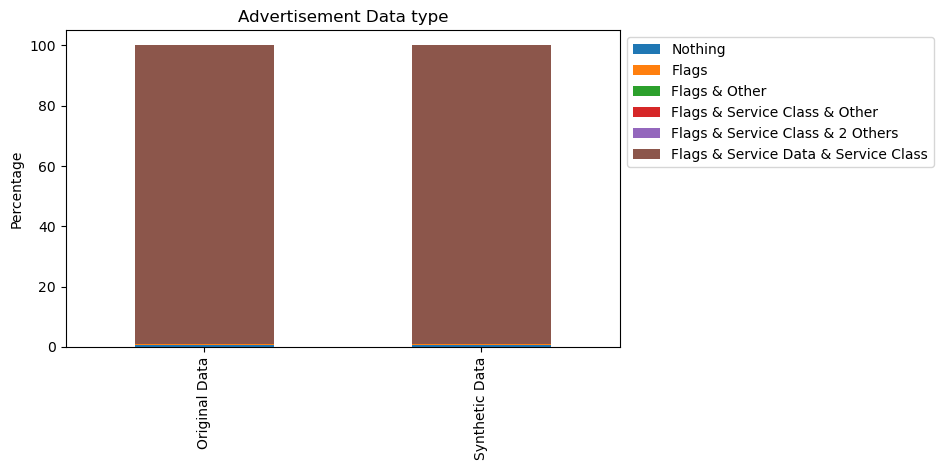

In [24]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
ad_percentage_df_normalized = ad_percentage_df.div(ad_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
ad_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('Advertisement Data type')
plt.ylabel('Percentage')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust legend position to prevent overlap
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Save the figure
plt.savefig(f"{plot_path}/ad.png", bbox_inches='tight')
plt.show()

### UUID

In [17]:
# Calculate the count of each combination of 'UUID Samsung' and 'UUID Other' in original_data
original_uuid_counts = original_data.groupby(['UUID Samsung', 'UUID Other']).size().reset_index(name='Count')
original_uuid_counts['Percentage'] = (original_uuid_counts['Count'] / original_uuid_counts['Count'].sum()) * 100

# Calculate the count of each combination of 'UUID Samsung' and 'UUID Other' in synthetic_data
synthetic_uuid_counts = synthetic_data.groupby(['UUID Samsung', 'UUID Other']).size().reset_index(name='Count')
synthetic_uuid_counts['Percentage'] = (synthetic_uuid_counts['Count'] / synthetic_uuid_counts['Count'].sum()) * 100

# Update row names
row_names = ['Nothing', 'Other', 'Samsung', 'Samsung & Other', '2 Samsung']
original_uuid_counts.index = row_names
synthetic_uuid_counts.index = row_names

uuid_percentage_original = original_uuid_counts['Percentage']
uuid_percentage_synthetic = synthetic_uuid_counts['Percentage']

uuid_percentage_df = pd.DataFrame({
    'Original Data': uuid_percentage_original,
    'Synthetic Data': uuid_percentage_synthetic
})

uuid_percentage_df = uuid_percentage_df.T

uuid_percentage_df

,Nothing,Other,Samsung,Samsung & Other,2 Samsung
Original Data,0.840336,0.008320,0.00832,0.008320,99.134703
Synthetic Data,0.846000,0.006833,0.00850,0.005167,99.133500


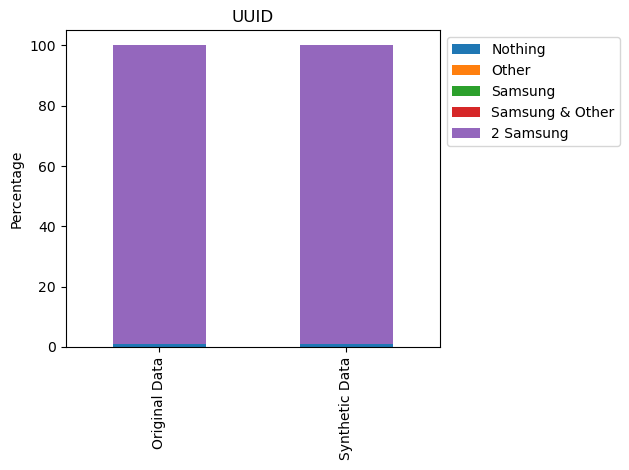

In [34]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
uuid_percentage_df_normalized = uuid_percentage_df.div(uuid_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
uuid_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('UUID')
plt.ylabel('Percentage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f"{plot_path}/uuid.png")
plt.show()

### PDU

In [44]:
# Calculate the percentage of each PDU in original_data
original_pdu_counts = original_data[['PDU ADV_IND', 'PDU Other']].sum()
original_pdu_percentage = original_pdu_counts / original_pdu_counts.sum() * 100

# Calculate the percentage of each PDU in synthetic_data
synthetic_pdu_counts = synthetic_data[['PDU ADV_IND', 'PDU Other']].sum()
synthetic_pdu_percentage = synthetic_pdu_counts / synthetic_pdu_counts.sum() * 100

# Create a DataFrame for plotting
pdu_percentage_df = pd.DataFrame({
    'Original Data': original_pdu_percentage,
    'Synthetic Data': synthetic_pdu_percentage
})

# Transpose the DataFrame for plotting
pdu_percentage_df = pdu_percentage_df.T

pdu_percentage_df

,PDU ADV_IND,PDU Other
Original Data,99.209585,0.790415
Synthetic Data,99.192500,0.807500


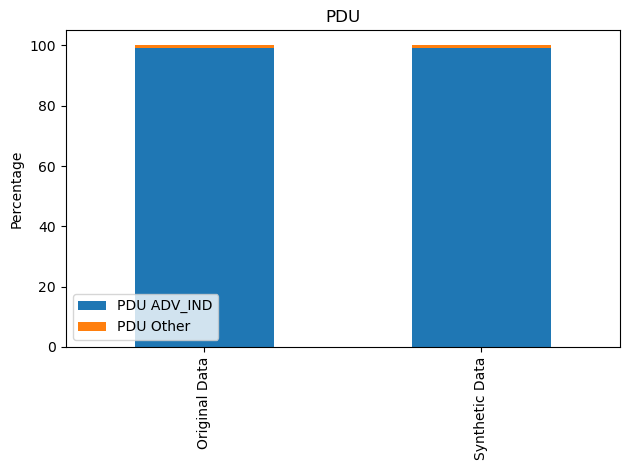

In [45]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
pdu_percentage_df_normalized = pdu_percentage_df.div(pdu_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
pdu_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('PDU')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig(f"{plot_path}/pdu.png")
plt.show()

### SmartTag type

In [49]:
# Add a new column 'ST Nothing' to handle cases where both 'ST 5' and 'ST Other' are 0
original_data['ST Nothing'] = ((original_data['ST 5'] == 0) & (original_data['ST Other'] == 0)).astype(int)
synthetic_data['ST Nothing'] = ((synthetic_data['ST 5'] == 0) & (synthetic_data['ST Other'] == 0)).astype(int)

# Calculate the percentage of each SmartTag type in original_data
original_st_counts = original_data[['ST 5', 'ST Other', 'ST Nothing']].sum()
original_st_percentage = original_st_counts / original_st_counts.sum() * 100

# Calculate the percentage of each SmartTag in synthetic_data
synthetic_st_counts = synthetic_data[['ST 5', 'ST Other', 'ST Nothing']].sum()
synthetic_st_percentage = synthetic_st_counts / synthetic_st_counts.sum() * 100

# Create a DataFrame for plotting
st_percentage_df = pd.DataFrame({
    'Original Data': original_st_percentage,
    'Synthetic Data': synthetic_st_percentage
})

# Transpose the DataFrame for plotting
st_percentage_df = st_percentage_df.T

st_percentage_df

,ST 5,ST Other,ST Nothing
Original Data,99.138863,0.004160,0.856976
Synthetic Data,99.139167,0.003167,0.857667


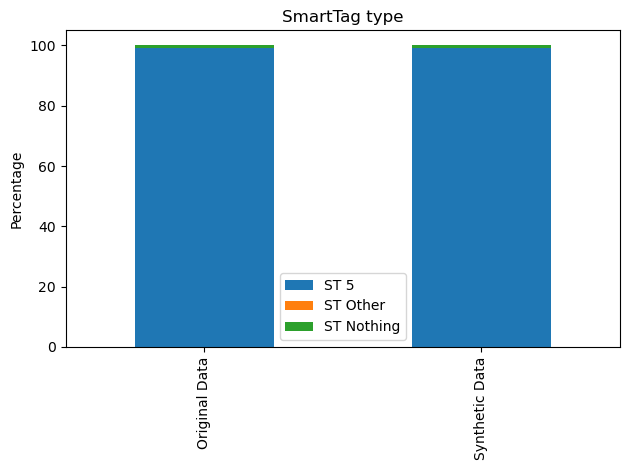

In [50]:
# Normalize the percentages to make the stacked bar chart height 100% for each dataset
st_percentage_df_normalized = st_percentage_df.div(st_percentage_df.sum(axis=1), axis=0) * 100

# Plot the normalized stacked bar chart
st_percentage_df_normalized.plot(kind='bar', stacked=True)
plt.title('SmartTag type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.savefig(f"{plot_path}/st.png")
plt.show()